In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

In [16]:
# generate data
np.random.seed(2)
m = 10                
dim = 2              
x_true = np.array([2.0, -1.5])  
a = np.random.uniform(-5, 5, (m, dim))
noise_std = 1
v = np.random.normal(0, noise_std, m)
rho = np.linalg.norm(a - x_true, axis=1) + v

In [ ]:
# build and solve optimization problem
x = cp.Variable(2, name='x')
t = cp.Variable(m, name='t')
objective = cp.Minimize(cp.sum_squares(cp.sqrt(cp.sum(cp.square(x - a), axis=1)) - rho))
problem = cp.Problem(objective)
problem.solve(solver=cp.IPOPT, nlp=True, verbose=True)
assert problem.status == cp.OPTIMAL

(CVXPY) Dec 07 06:03:30 PM: Your problem has 2 variables, 0 constraints, and 0 parameters.
(CVXPY) Dec 07 06:03:30 PM: It is compliant with the following grammars: 
(CVXPY) Dec 07 06:03:30 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 07 06:03:30 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Dec 07 06:03:30 PM: Your problem is compiled with the CPP canonicalization backend.


                                     CVXPY                                     
                             v1.7.0.dev0+0.5870139                             
This is Ipopt version 3.11.9, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:       90
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       40

Least square initialization of z_L, z_U,v_L, v_U, y_c, y_d failed!
Total number of variables............................:       42
                     variables with only lower bounds:       10
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       40
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds

Estimated source location: [ 1.84357297 -1.53172606]
True source location: [ 2.  -1.5]


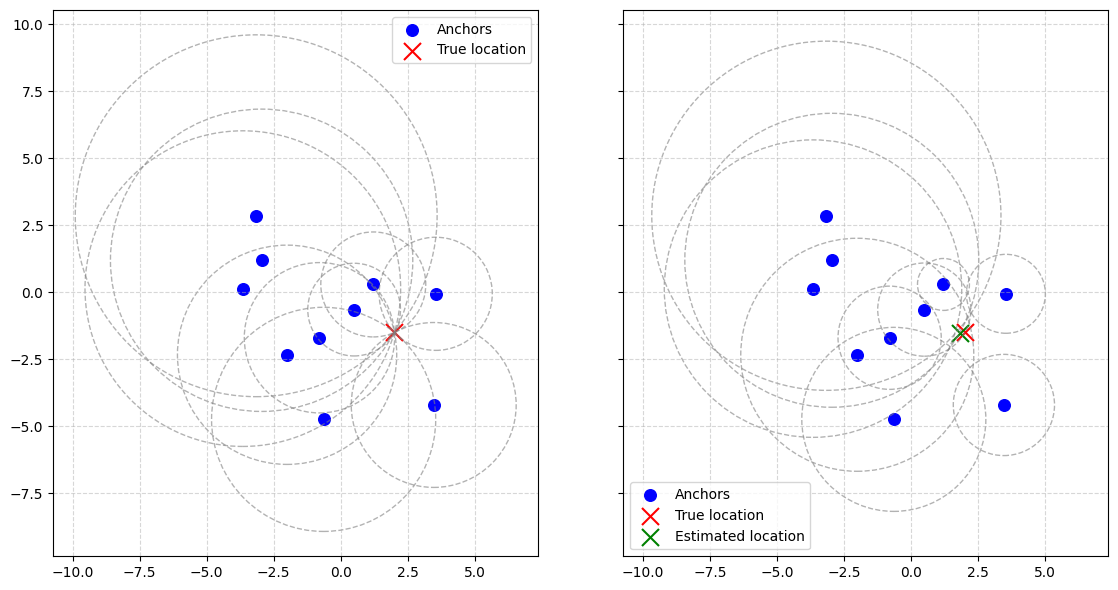

In [20]:
# visualize
print("Estimated source location:", x.value)
print("True source location:", x_true)

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
rho_no_noise = np.linalg.norm(a - x_true, axis=1)

for ax in axes:
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.5)

# Left: anchors, true location, noiseless circles
ax = axes[0]
ax.scatter(a[:, 0], a[:, 1], c='blue', label='Anchors', s=70)
ax.scatter(*x_true, c='red', label='True location', s=150, marker='x')
for i in range(m):
    circle = plt.Circle(a[i], rho_no_noise[i], color='gray', fill=False, linestyle='--', alpha=0.6)
    ax.add_patch(circle)
ax.legend()

# Right: anchors, true location, estimated location, noisy circles
ax = axes[1]
ax.scatter(a[:, 0], a[:, 1], c='blue', label='Anchors', s=70)
ax.scatter(*x_true, c='red', label='True location', s=150, marker='x')
ax.scatter(*x.value, c='green', label='Estimated location', s=150, marker='x')
for i in range(m):
    circle = plt.Circle(a[i], rho[i], color='gray', fill=False, linestyle='--', alpha=0.6)
    ax.add_patch(circle)
ax.legend()

plt.tight_layout()
plt.savefig("figures/localization.pdf")